In [44]:
from db.mongo_handler import load_mongo_data
from db.postgres_handler import load_postgres_data

from utils.trading_turn import trading_turn
from utils.transaction_num import transaction_num
from utils.avg_cash_ratio import avg_cash_ratio
from utils.avg_stay_time import avg_stay_time
from utils.avg_trade_ratio import avg_trade_ratio, avg_buy_ratio, avg_sell_ratio
from utils.tag_avg_stay_time import tag_avg_stay_time
from utils.bet_buy_ratio import bet_buy_ratio
from utils.bet_sell_ratio import bet_sell_ratio
from utils.bet_shares import bet_shares

#from models.preprocessing.userId_drop import userId_drop
from models.preprocessing.delete_cols import delete_cols



# 데이터 불러오기
mongo_df = load_mongo_data(None, "invest_dummy")

seed_query = "SELECT chapter_id, seed_money FROM invest_chapter ;"
user_query = "SELECT user_id, sex, age, created_at FROM users;"
#scenario_query = "SELECT investSessionId, scenarioId FROM invest_session;"

seed_df = load_postgres_data(seed_query)
user_df = load_postgres_data(user_query)
#scenario_df = load_postgres_data(scenario_query)

### user_df에 있는 userId가 uuid로 출력됨 -> str타입으로 바꿔서 출력
user_df['userId'] = user_df['userId'].astype(str)


# 데이터 병합
merged = mongo_df.merge(seed_df, on="chapterId", how="inner")
df = merged.merge(user_df, on="userId", how="inner")


# 집계
# Preprocessing
userInfo = df[['userId', 'sex', 'age', 'createdAt']].drop_duplicates()
scenarioInfo = df[["scenarioId", "chapterId","investSessionId"]].drop_duplicates()

tradingTurn = trading_turn(df)
transactionNum = transaction_num(df)
avgCashRatio = avg_cash_ratio(df)
avgStayTime = avg_stay_time(df)

buy = avg_buy_ratio(df)
sell = avg_sell_ratio(df)
avgTradeRatio = avg_trade_ratio(buy, sell)

tagAvgStayTime = tag_avg_stay_time(df)
betBuyRatio = bet_buy_ratio(df)
betSellRatio = bet_sell_ratio(df)
betShares = bet_shares(df)

# user정보 drop
df_list = [
    tradingTurn,
    transactionNum,
    avgCashRatio,
    avgStayTime,
    avgTradeRatio,
    tagAvgStayTime,
    betBuyRatio,
    betSellRatio,
    betShares,
]

for i in range(len(df_list)):
    df_list[i] = delete_cols(df_list[i])

tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares = df_list

merged = tradingTurn.merge(transactionNum, on=['investSessionId', 'userId'], how='inner').merge(avgCashRatio, on=['investSessionId', 'userId'], how='inner').merge(avgStayTime, on=['investSessionId', 'userId'], how='inner').merge(avgTradeRatio, on=["investSessionId", "userId"], how='inner').merge(tagAvgStayTime, on=['investSessionId', 'userId'], how='inner').merge(betBuyRatio, on=['investSessionId', 'userId'], how='inner').merge(betSellRatio, on=['investSessionId', 'userId'], how='inner').merge(betShares, on=['investSessionId', 'userId'], how='inner')
merged2 = merged.merge(userInfo, on='userId', how="inner")

fin_df = merged2.merge(scenarioInfo, on="investSessionId", how="inner")


buyRatioPivot                            investSessionId  \
0     0006ddc3-cab5-3f5a-66e0-09576a3fc14e   
1     00191759-0647-9fea-9c3e-a9082e236c41   
2     001fe878-493b-946a-d702-8b548948ad97   
3     00218dbf-34a8-8ec0-416c-2af7e75ae7d7   
4     002b662f-ae07-6351-9f3d-24fb4fa45b1b   
...                                    ...   
8045  ffdb7cba-2835-8c59-981e-1757ee47c39f   
8046  ffe2f488-269e-d59f-d12e-1b8258a4b624   
8047  ffe66625-c185-cb22-67a2-6db26198cc54   
8048  fffb52d6-bec2-51d3-a1af-48bf6a3c742d   
8049  fffb8e63-a3cc-a1a6-4951-47a089eff5e4   

                                    userId  age  highBuyRatio  lowBuyRatio  \
0     d97a07eb-8dd9-4cbe-a4c4-8c61017ada71    6      1.000000     0.000000   
1     da35e508-de86-44f7-b7bf-ebffd85a3b5c   24      1.000000     0.000000   
2     fa975c93-78ec-49c6-b60f-e70435f18c34   12      0.533333     0.366667   
3     4e6e7fc1-fe03-41d5-8f02-0766a377bf31   10      0.105263     0.263158   
4     5bda4ade-431a-47ef-a62c-7bd895ece820 

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144900 entries, 0 to 144899
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   _id              144900 non-null  object        
 1   investSessionId  144900 non-null  object        
 2   chapterId        144900 non-null  object        
 3   scenarioId       144900 non-null  object        
 4   userId           144900 non-null  object        
 5   turn             144900 non-null  int64         
 6   riskLevel        144900 non-null  object        
 7   currentPoint     144900 non-null  int64         
 8   beforeValue      144900 non-null  int64         
 9   currentValue     144900 non-null  int64         
 10  initialValue     144900 non-null  int64         
 11  numberOfShares   144900 non-null  int64         
 12  income           144900 non-null  int64         
 13  transactionType  144900 non-null  object        
 14  plusClick        144

In [45]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   investSessionId  3501 non-null   object         
 1   userId           3501 non-null   object         
 2   avgNotKeep       3501 non-null   float64        
 3   click            3501 non-null   float64        
 4   avgCashRatio     3501 non-null   float64        
 5   avgStayTime      3501 non-null   float64        
 6   highBuyRatio     3501 non-null   float64        
 7   lowBuyRatio      3501 non-null   float64        
 8   midBuyRatio      3501 non-null   float64        
 9   highSellRatio    3501 non-null   float64        
 10  lowSellRatio     3501 non-null   float64        
 11  midSellRatio     3501 non-null   float64        
 12  tagAvgStayTime   3501 non-null   timedelta64[ns]
 13  betBuyRatio      3501 non-null   float64        
 14  betSellRatio     3501 no

In [33]:
fin_df['tagAvgStayTime'] = fin_df['tagAvgStayTime'].dt.total_seconds()
fin_df['tagAvgStayTime']

investSessionId
001fe878-493b-946a-d702-8b548948ad97     81.000000
00218dbf-34a8-8ec0-416c-2af7e75ae7d7     92.666667
0036016e-edb3-561f-1b2b-2d945329d4d8     53.800000
003b756d-2dab-cf67-0cfb-ed727e8d70d6     96.333333
003ca49a-9ad1-33d2-943d-ce55b0106a88     71.600000
                                           ...    
ffc5fb91-da86-26df-7f46-45499bda1758     79.000000
ffd21b0a-557c-c32d-2836-fbd9f435d7de     94.000000
ffd5bc11-279d-0063-b370-12f70deb85da     94.833333
ffe2f488-269e-d59f-d12e-1b8258a4b624    126.000000
ffe66625-c185-cb22-67a2-6db26198cc54    115.200000
Name: tagAvgStayTime, Length: 3501, dtype: float64

In [31]:
fin_df.head()

,userId,avgNotKeep,click,avgCashRatio,avgStayTime,highBuyRatio,lowBuyRatio,midBuyRatio,highSellRatio,lowSellRatio,midSellRatio,tagAvgStayTime,betBuyRatio,betSellRatio,betMidShares,betHighShares,sex,age,createdAt,scenarioId
investSessionId,,,,,,,,,,,,,,,,,,,,
001fe878-493b-946a-d702-8b548948ad97,fa975c93-78ec-49c6-b60f-e70435f18c34,1.000000,1.222222,0.640500,91.333333,0.533333,0.366667,0.100000,0.285714,0.571429,0.142857,0 days 00:01:21,0.250000,1.0,2.0,7.0,M,12,2025-06-15 08:57:44.565948,eac53c18-0503-4859-8f28-f916b84fb2d2
00218dbf-34a8-8ec0-416c-2af7e75ae7d7,4e6e7fc1-fe03-41d5-8f02-0766a377bf31,0.833333,0.888889,0.012500,92.666667,0.105263,0.263158,0.631579,0.400000,0.000000,0.600000,0 days 00:01:32.666666666,1.000000,0.0,5.0,2.0,M,10,2025-06-14 12:32:18.675997,76ffeedd-674e-4f99-b783-234d543d98b4
0036016e-edb3-561f-1b2b-2d945329d4d8,3ed8a159-adb0-4380-a648-e015cb82690a,0.833333,1.166667,0.048800,71.833333,0.056338,0.356808,0.586854,0.000000,0.000000,1.000000,0 days 00:00:53.800000,0.333333,1.0,97.0,0.0,M,12,2025-06-17 14:20:37.232736,1510c2f4-92d0-4eae-9d60-2b084a7ded45
003b756d-2dab-cf67-0cfb-ed727e8d70d6,d7fbb0db-1929-4140-9b64-58d1659d9b3e,1.000000,4.111111,0.483600,96.333333,0.448276,0.310345,0.241379,0.636364,0.181818,0.181818,0 days 00:01:36.333333333,0.333333,0.0,35.0,19.0,M,24,2025-06-13 08:04:58.803067,1510c2f4-92d0-4eae-9d60-2b084a7ded45
003ca49a-9ad1-33d2-943d-ce55b0106a88,2bf33509-f117-49b9-98fb-89cdaab60408,1.000000,2.333333,0.659333,73.833333,0.403846,0.298077,0.298077,0.000000,0.250000,0.750000,0 days 00:01:11.600000,0.500000,1.0,5.0,14.0,M,12,2025-06-15 05:55:15.825236,7bda23f1-81b4-4719-8d73-c6b3f86f84f4


In [63]:
import pandas as pd

from db.mongo_handler import load_mongo_data
from db.postgres_handler import load_postgres_data

from utils.trading_turn import trading_turn
from utils.transaction_num import transaction_num
from utils.avg_cash_ratio import avg_cash_ratio
from utils.avg_stay_time import avg_stay_time
from utils.avg_trade_ratio import avg_trade_ratio, avg_buy_ratio, avg_sell_ratio
from utils.tag_avg_stay_time import tag_avg_stay_time
from utils.bet_buy_ratio import bet_buy_ratio
from utils.bet_sell_ratio import bet_sell_ratio
from utils.bet_shares import bet_shares

#from models.preprocessing.userId_drop import userId_drop
from models.preprocessing.delete_cols import delete_cols
from models.preprocessing.time_type import time_type

from sklearn.preprocessing import StandardScaler


# 데이터 불러오기
mongo_df = load_mongo_data(None, "invest_dummy")

seed_query = "SELECT chapter_id, seed_money FROM invest_chapter ;"
user_query = "SELECT user_id, sex, age, created_at FROM users;"
#scenario_query = "SELECT investSessionId, scenarioId FROM invest_session;"

seed_df = load_postgres_data(seed_query)
user_df = load_postgres_data(user_query)
#scenario_df = load_postgres_data(scenario_query)

### user_df에 있는 userId가 uuid로 출력됨 -> str타입으로 바꿔서 출력
user_df['userId'] = user_df['userId'].astype(str)


# 데이터 병합
merged = mongo_df.merge(seed_df, on="chapterId", how="inner")
df = merged.merge(user_df, on="userId", how="inner")


# 집계
userInfo = df[['userId', 'sex', 'age', 'createdAt']].drop_duplicates()
scenarioInfo = df[["scenarioId", "chapterId","investSessionId"]].drop_duplicates()

tradingTurn = trading_turn(df)
transactionNum = transaction_num(df)
avgCashRatio = avg_cash_ratio(df)
avgStayTime = avg_stay_time(df)

buy = avg_buy_ratio(df)
sell = avg_sell_ratio(df)
avgTradeRatio = avg_trade_ratio(buy, sell)

tagAvgStayTime = tag_avg_stay_time(df)
betBuyRatio = bet_buy_ratio(df)
betSellRatio = bet_sell_ratio(df)
betShares = bet_shares(df)

# age, startedAt drop
df_list = [tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares]

for i in range(len(df_list)):
    df_list[i] = delete_cols(df_list[i])

tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares = df_list


# 데이터 병합
merged = tradingTurn.merge(transactionNum, on=['investSessionId', 'userId'], how='inner').merge(avgCashRatio, on=['investSessionId', 'userId'], how='inner').merge(avgStayTime, on=['investSessionId', 'userId'], how='inner').merge(avgTradeRatio, on=["investSessionId", "userId"], how='inner').merge(tagAvgStayTime, on=['investSessionId', 'userId'], how='inner').merge(betBuyRatio, on=['investSessionId', 'userId'], how='inner').merge(betSellRatio, on=['investSessionId', 'userId'], how='inner').merge(betShares, on=['investSessionId', 'userId'], how='inner')
merged2 = merged.merge(userInfo, on='userId', how="inner")
fin_df = merged2.merge(scenarioInfo, on="investSessionId", how="inner")


# 전처리

# investSessionId를 index로
fin_df = fin_df.set_index("investSessionId")

# userId, scenarioId drop
fin_df.drop(["userId","scenarioId"], axis=1, inplace=True)

# 시간 타입 데이터 변환
df = time_type(fin_df)



df

buyRatioPivot                            investSessionId  \
0     0006ddc3-cab5-3f5a-66e0-09576a3fc14e   
1     00191759-0647-9fea-9c3e-a9082e236c41   
2     001fe878-493b-946a-d702-8b548948ad97   
3     00218dbf-34a8-8ec0-416c-2af7e75ae7d7   
4     002b662f-ae07-6351-9f3d-24fb4fa45b1b   
...                                    ...   
8045  ffdb7cba-2835-8c59-981e-1757ee47c39f   
8046  ffe2f488-269e-d59f-d12e-1b8258a4b624   
8047  ffe66625-c185-cb22-67a2-6db26198cc54   
8048  fffb52d6-bec2-51d3-a1af-48bf6a3c742d   
8049  fffb8e63-a3cc-a1a6-4951-47a089eff5e4   

                                    userId  age  highBuyRatio  lowBuyRatio  \
0     d97a07eb-8dd9-4cbe-a4c4-8c61017ada71    6      1.000000     0.000000   
1     da35e508-de86-44f7-b7bf-ebffd85a3b5c   24      1.000000     0.000000   
2     fa975c93-78ec-49c6-b60f-e70435f18c34   12      0.533333     0.366667   
3     4e6e7fc1-fe03-41d5-8f02-0766a377bf31   10      0.105263     0.263158   
4     5bda4ade-431a-47ef-a62c-7bd895ece820 

,avgNotKeep,click,avgCashRatio,avgStayTime,highBuyRatio,lowBuyRatio,midBuyRatio,highSellRatio,lowSellRatio,midSellRatio,tagAvgStayTime,betBuyRatio,betSellRatio,betMidShares,betHighShares,sex,age,chapterId,daysSinceStart
investSessionId,,,,,,,,,,,,,,,,,,,
001fe878-493b-946a-d702-8b548948ad97,1.000000,1.222222,0.640500,91.333333,0.533333,0.366667,0.100000,0.285714,0.571429,0.142857,81.000000,0.250000,1.0,2.0,7.0,M,12,2222,5
00218dbf-34a8-8ec0-416c-2af7e75ae7d7,0.833333,0.888889,0.012500,92.666667,0.105263,0.263158,0.631579,0.400000,0.000000,0.600000,92.666667,1.000000,0.0,5.0,2.0,M,10,2222,6
0036016e-edb3-561f-1b2b-2d945329d4d8,0.833333,1.166667,0.048800,71.833333,0.056338,0.356808,0.586854,0.000000,0.000000,1.000000,53.800000,0.333333,1.0,97.0,0.0,M,12,4444,3
003b756d-2dab-cf67-0cfb-ed727e8d70d6,1.000000,4.111111,0.483600,96.333333,0.448276,0.310345,0.241379,0.636364,0.181818,0.181818,96.333333,0.333333,0.0,35.0,19.0,M,24,4444,7
003ca49a-9ad1-33d2-943d-ce55b0106a88,1.000000,2.333333,0.659333,73.833333,0.403846,0.298077,0.298077,0.000000,0.250000,0.750000,71.600000,0.500000,1.0,5.0,14.0,M,12,3333,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc5fb91-da86-26df-7f46-45499bda1758,0.500000,0.944444,0.000000,85.000000,0.000000,0.545455,0.454545,0.000000,0.166667,0.833333,79.000000,1.000000,0.0,5.0,0.0,M,24,2222,7
ffd21b0a-557c-c32d-2836-fbd9f435d7de,1.000000,1.222222,0.192857,101.500000,0.250000,0.166667,0.583333,0.000000,0.333333,0.666667,94.000000,0.000000,1.0,1.0,0.0,M,12,1111,3
ffd5bc11-279d-0063-b370-12f70deb85da,0.833333,0.944444,0.077381,94.833333,0.300000,0.300000,0.400000,1.000000,0.000000,0.000000,94.833333,0.000000,0.5,4.0,0.0,M,67,1111,3


In [ ]:
fin_df = fin_df["investSessionId"].index()

In [61]:
fin_df

RangeIndex(start=0, stop=3501, step=1)

In [65]:
def one_hot_encoder(df, cols):
    
    df_encoded = pd.get_dummies(
        df, 
        columns=cols,
        drop_first=True,
        dtype=int
    )

    print(f"원본 컬럼 수: {df.shape[1]}")
    print(f"인코딩 후 컬럼 수: {df_encoded.shape[1]}")
    print(f"추가된 컬럼 수: {df_encoded.shape[1] - df.shape[1]}")
    
    return df_encoded

one_hot_encoder(df, ['sex'])

원본 컬럼 수: 19
인코딩 후 컬럼 수: 19
추가된 컬럼 수: 0


,avgNotKeep,click,avgCashRatio,avgStayTime,highBuyRatio,lowBuyRatio,midBuyRatio,highSellRatio,lowSellRatio,midSellRatio,tagAvgStayTime,betBuyRatio,betSellRatio,betMidShares,betHighShares,age,chapterId,daysSinceStart,sex_M
investSessionId,,,,,,,,,,,,,,,,,,,
001fe878-493b-946a-d702-8b548948ad97,1.000000,1.222222,0.640500,91.333333,0.533333,0.366667,0.100000,0.285714,0.571429,0.142857,81.000000,0.250000,1.0,2.0,7.0,12,2222,5,1
00218dbf-34a8-8ec0-416c-2af7e75ae7d7,0.833333,0.888889,0.012500,92.666667,0.105263,0.263158,0.631579,0.400000,0.000000,0.600000,92.666667,1.000000,0.0,5.0,2.0,10,2222,6,1
0036016e-edb3-561f-1b2b-2d945329d4d8,0.833333,1.166667,0.048800,71.833333,0.056338,0.356808,0.586854,0.000000,0.000000,1.000000,53.800000,0.333333,1.0,97.0,0.0,12,4444,3,1
003b756d-2dab-cf67-0cfb-ed727e8d70d6,1.000000,4.111111,0.483600,96.333333,0.448276,0.310345,0.241379,0.636364,0.181818,0.181818,96.333333,0.333333,0.0,35.0,19.0,24,4444,7,1
003ca49a-9ad1-33d2-943d-ce55b0106a88,1.000000,2.333333,0.659333,73.833333,0.403846,0.298077,0.298077,0.000000,0.250000,0.750000,71.600000,0.500000,1.0,5.0,14.0,12,3333,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffc5fb91-da86-26df-7f46-45499bda1758,0.500000,0.944444,0.000000,85.000000,0.000000,0.545455,0.454545,0.000000,0.166667,0.833333,79.000000,1.000000,0.0,5.0,0.0,24,2222,7,1
ffd21b0a-557c-c32d-2836-fbd9f435d7de,1.000000,1.222222,0.192857,101.500000,0.250000,0.166667,0.583333,0.000000,0.333333,0.666667,94.000000,0.000000,1.0,1.0,0.0,12,1111,3,1
ffd5bc11-279d-0063-b370-12f70deb85da,0.833333,0.944444,0.077381,94.833333,0.300000,0.300000,0.400000,1.000000,0.000000,0.000000,94.833333,0.000000,0.5,4.0,0.0,67,1111,3,1


In [67]:
import pandas as pd

from db.mongo_handler import load_mongo_data
from db.postgres_handler import load_postgres_data

from utils.trading_turn import trading_turn
from utils.transaction_num import transaction_num
from utils.avg_cash_ratio import avg_cash_ratio
from utils.avg_stay_time import avg_stay_time
from utils.avg_trade_ratio import avg_trade_ratio, avg_buy_ratio, avg_sell_ratio
from utils.tag_avg_stay_time import tag_avg_stay_time
from utils.bet_buy_ratio import bet_buy_ratio
from utils.bet_sell_ratio import bet_sell_ratio
from utils.bet_shares import bet_shares

#from models.preprocessing.userId_drop import userId_drop
from models.preprocessing.delete_cols import delete_cols
from models.preprocessing.time_type import time_type
from models.preprocessing.encoder import one_hot_encoder

from sklearn.preprocessing import StandardScaler


def model_preprocess():
    # 데이터 불러오기
    mongo_df = load_mongo_data(None, "invest_dummy")

    seed_query = "SELECT chapter_id, seed_money FROM invest_chapter ;"
    user_query = "SELECT user_id, sex, age, created_at FROM users;"
    #scenario_query = "SELECT investSessionId, scenarioId FROM invest_session;"

    seed_df = load_postgres_data(seed_query)
    user_df = load_postgres_data(user_query)
    #scenario_df = load_postgres_data(scenario_query)

    ### user_df에 있는 userId가 uuid로 출력됨 -> str타입으로 바꿔서 출력
    user_df['userId'] = user_df['userId'].astype(str)


    # 데이터 병합
    merged = mongo_df.merge(seed_df, on="chapterId", how="inner")
    df = merged.merge(user_df, on="userId", how="inner")


    # 집계
    userInfo = df[['userId', 'sex', 'age', 'createdAt']].drop_duplicates()
    scenarioInfo = df[["scenarioId", "chapterId","investSessionId"]].drop_duplicates()

    tradingTurn = trading_turn(df)
    transactionNum = transaction_num(df)
    avgCashRatio = avg_cash_ratio(df)
    avgStayTime = avg_stay_time(df)

    buy = avg_buy_ratio(df)
    sell = avg_sell_ratio(df)
    avgTradeRatio = avg_trade_ratio(buy, sell)

    tagAvgStayTime = tag_avg_stay_time(df)
    betBuyRatio = bet_buy_ratio(df)
    betSellRatio = bet_sell_ratio(df)
    betShares = bet_shares(df)

    # age, startedAt drop
    df_list = [tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares]

    for i in range(len(df_list)):
        df_list[i] = delete_cols(df_list[i])

    tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares = df_list


    # 데이터 병합
    merged = tradingTurn.merge(transactionNum, on=['investSessionId', 'userId'], how='inner').merge(avgCashRatio, on=['investSessionId', 'userId'], how='inner').merge(avgStayTime, on=['investSessionId', 'userId'], how='inner').merge(avgTradeRatio, on=["investSessionId", "userId"], how='inner').merge(tagAvgStayTime, on=['investSessionId', 'userId'], how='inner').merge(betBuyRatio, on=['investSessionId', 'userId'], how='inner').merge(betSellRatio, on=['investSessionId', 'userId'], how='inner').merge(betShares, on=['investSessionId', 'userId'], how='inner')
    merged2 = merged.merge(userInfo, on='userId', how="inner")
    fin_df = merged2.merge(scenarioInfo, on="investSessionId", how="inner")


    # 전처리

    # investSessionId를 index로
    fin_df = fin_df.set_index("investSessionId")

    # userId, scenarioId drop
    fin_df.drop(["userId","scenarioId"], axis=1, inplace=True)

    # 시간 타입 데이터 변환
    df = time_type(fin_df)

    # 성별 원핫인코딩
    df = one_hot_encoder(df, ['sex'])

    return df

df = model_preprocess()


buyRatioPivot                            investSessionId  \
0     0006ddc3-cab5-3f5a-66e0-09576a3fc14e   
1     00191759-0647-9fea-9c3e-a9082e236c41   
2     001fe878-493b-946a-d702-8b548948ad97   
3     00218dbf-34a8-8ec0-416c-2af7e75ae7d7   
4     002b662f-ae07-6351-9f3d-24fb4fa45b1b   
...                                    ...   
8045  ffdb7cba-2835-8c59-981e-1757ee47c39f   
8046  ffe2f488-269e-d59f-d12e-1b8258a4b624   
8047  ffe66625-c185-cb22-67a2-6db26198cc54   
8048  fffb52d6-bec2-51d3-a1af-48bf6a3c742d   
8049  fffb8e63-a3cc-a1a6-4951-47a089eff5e4   

                                    userId  age  highBuyRatio  lowBuyRatio  \
0     d97a07eb-8dd9-4cbe-a4c4-8c61017ada71    6      1.000000     0.000000   
1     da35e508-de86-44f7-b7bf-ebffd85a3b5c   24      1.000000     0.000000   
2     fa975c93-78ec-49c6-b60f-e70435f18c34   12      0.533333     0.366667   
3     4e6e7fc1-fe03-41d5-8f02-0766a377bf31   10      0.105263     0.263158   
4     5bda4ade-431a-47ef-a62c-7bd895ece820 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3501 entries, 001fe878-493b-946a-d702-8b548948ad97 to ffe66625-c185-cb22-67a2-6db26198cc54
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avgNotKeep      3501 non-null   float64
 1   click           3501 non-null   float64
 2   avgCashRatio    3501 non-null   float64
 3   avgStayTime     3501 non-null   float64
 4   highBuyRatio    3501 non-null   float64
 5   lowBuyRatio     3501 non-null   float64
 6   midBuyRatio     3501 non-null   float64
 7   highSellRatio   3501 non-null   float64
 8   lowSellRatio    3501 non-null   float64
 9   midSellRatio    3501 non-null   float64
 10  tagAvgStayTime  3501 non-null   float64
 11  betBuyRatio     3501 non-null   float64
 12  betSellRatio    3501 non-null   float64
 13  betMidShares    3501 non-null   float64
 14  betHighShares   3501 non-null   float64
 15  age             3501 non-null   int64  
 16  chapterId       

In [71]:
import matplotlib.pyplot as plt

# 방법 1: rcParams 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

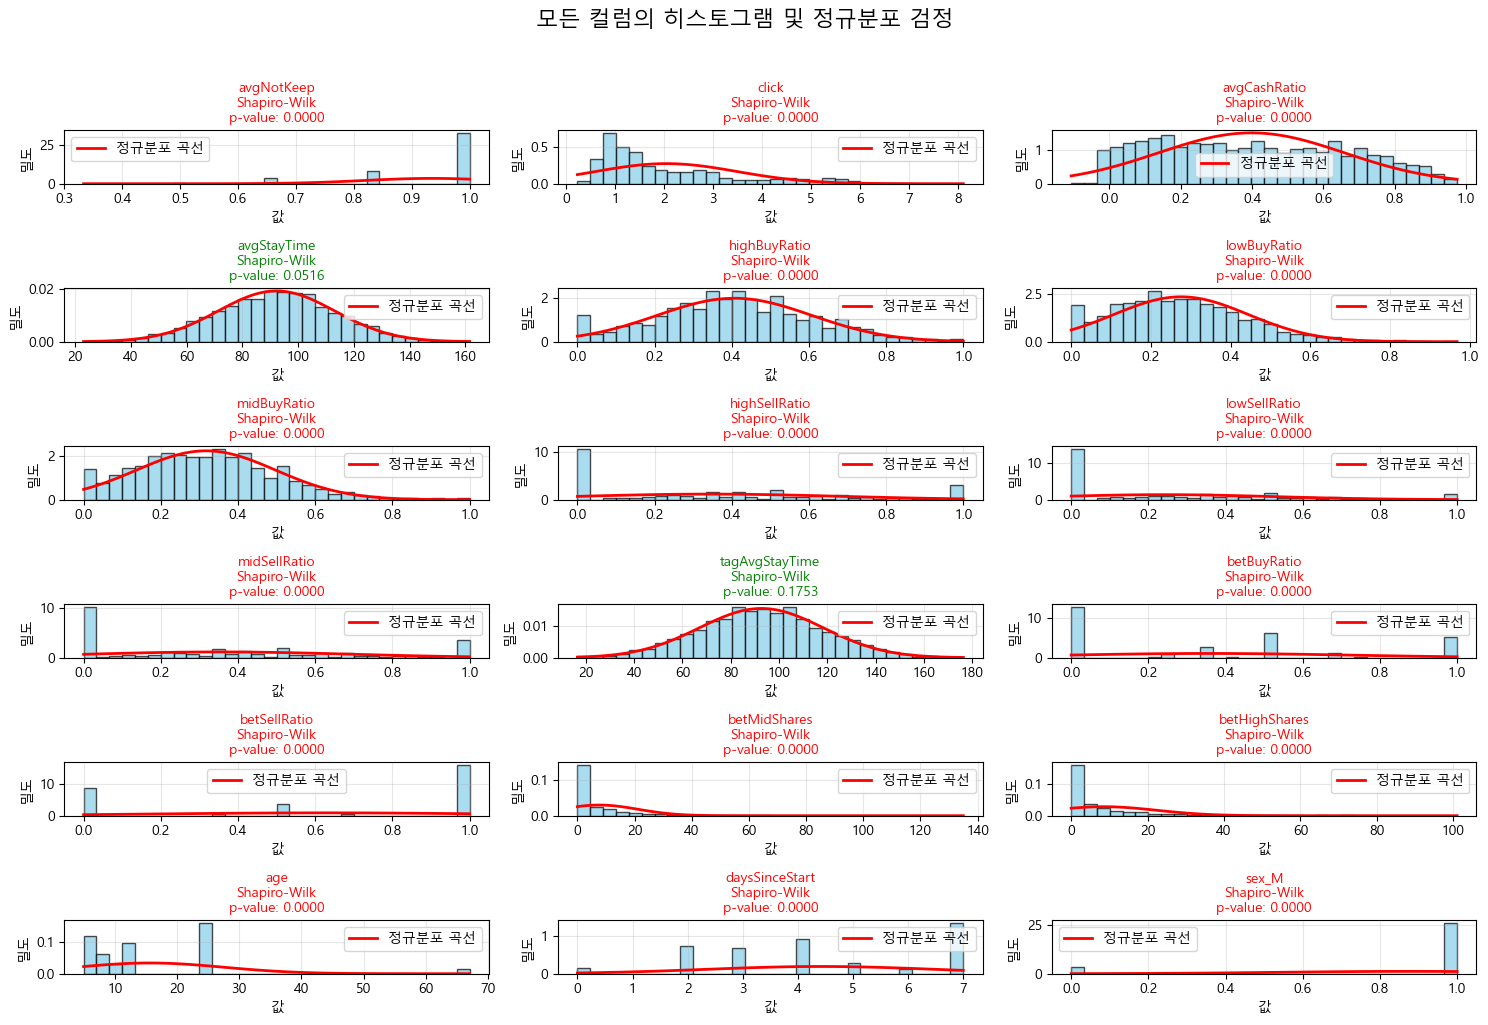


정규분포 검정 결과 요약
avgNotKeep           | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
click                | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
avgCashRatio         | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
avgStayTime          | Shapiro-Wilk    | p-value: 0.051618 | 정규분포를 따름
highBuyRatio         | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
lowBuyRatio          | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
midBuyRatio          | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
highSellRatio        | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
lowSellRatio         | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
midSellRatio         | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
tagAvgStayTime       | Shapiro-Wilk    | p-value: 0.175331 | 정규분포를 따름
betBuyRatio          | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
betSellRatio         | Shapiro-Wilk    | p-value: 0.000000 | 정규분포를 따르지 않음
betMidShares         | Shapiro-

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

def check_normality_and_plot(df, figsize=(15, 10)):
    """
    데이터프레임의 모든 숫자형 컬럼에 대해 정규분포 검정과 히스토그램을 그리는 함수
    
    Parameters:
    df: pandas DataFrame
    figsize: tuple, 전체 그래프 크기
    """
    
    # 숫자형 컬럼만 선택
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if not numeric_cols:
        print("숫자형 컬럼이 없습니다.")
        return
    
    # 서브플롯 개수 계산
    n_cols = len(numeric_cols)
    n_rows = (n_cols + 2) // 3  # 3열로 배치
    
    # 그래프 설정
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    fig.suptitle('모든 컬럼의 히스토그램 및 정규분포 검정', fontsize=16, y=1.02)
    
    # axes를 1차원으로 변환 (단일 행인 경우 처리)
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # 정규분포 검정 결과 저장
    normality_results = {}
    
    for i, col in enumerate(numeric_cols):
        # 결측값 제거
        data = df[col].dropna()
        
        if len(data) == 0:
            print(f"{col}: 데이터가 없습니다.")
            continue
            
        # 히스토그램 그리기
        axes[i].hist(data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        
        # 정규분포 곡선 오버레이
        mu, sigma = stats.norm.fit(data)
        x = np.linspace(data.min(), data.max(), 100)
        axes[i].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='정규분포 곡선')
        
        # Shapiro-Wilk 검정 (샘플 크기가 5000 이하일 때)
        if len(data) <= 5000:
            shapiro_stat, shapiro_p = stats.shapiro(data)
            normality_results[col] = {
                'test': 'Shapiro-Wilk',
                'statistic': shapiro_stat,
                'p_value': shapiro_p,
                'is_normal': shapiro_p > 0.05
            }
            test_result = f"Shapiro-Wilk\np-value: {shapiro_p:.4f}"
        else:
            # 큰 샘플의 경우 Kolmogorov-Smirnov 검정 사용
            ks_stat, ks_p = stats.kstest(data, 'norm', args=(mu, sigma))
            normality_results[col] = {
                'test': 'Kolmogorov-Smirnov',
                'statistic': ks_stat,
                'p_value': ks_p,
                'is_normal': ks_p > 0.05
            }
            test_result = f"K-S Test\np-value: {ks_p:.4f}"
        
        # 그래프 제목 및 레이블 설정
        is_normal = normality_results[col]['is_normal']
        color = 'green' if is_normal else 'red'
        axes[i].set_title(f'{col}\n{test_result}', fontsize=10, color=color)
        axes[i].set_xlabel('값')
        axes[i].set_ylabel('밀도')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # 빈 서브플롯 숨기기
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # 검정 결과 요약 출력
    print("\n" + "="*60)
    print("정규분포 검정 결과 요약")
    print("="*60)
    
    for col, result in normality_results.items():
        status = "정규분포를 따름" if result['is_normal'] else "정규분포를 따르지 않음"
        print(f"{col:20s} | {result['test']:15s} | p-value: {result['p_value']:.6f} | {status}")
    
    return normality_results

# 사용 예시
# df = pd.read_csv('your_data.csv')  # 데이터 로드
# results = check_normality_and_plot(df)

results = check_normality_and_plot(df)

In [73]:
import pandas as pd

from db.mongo_handler import load_mongo_data
from db.postgres_handler import load_postgres_data

from utils.trading_turn import trading_turn
from utils.transaction_num import transaction_num
from utils.avg_cash_ratio import avg_cash_ratio
from utils.avg_stay_time import avg_stay_time
from utils.avg_trade_ratio import avg_trade_ratio, avg_buy_ratio, avg_sell_ratio
from utils.tag_avg_stay_time import tag_avg_stay_time
from utils.bet_buy_ratio import bet_buy_ratio
from utils.bet_sell_ratio import bet_sell_ratio
from utils.bet_shares import bet_shares

#from models.preprocessing.userId_drop import userId_drop
from models.preprocessing.delete_cols import delete_cols
from models.preprocessing.time_type import time_type
from models.preprocessing.encoder import one_hot_encoder
from models.preprocessing.scaler import standard_scaler



def model_preprocess():
    # 데이터 불러오기
    mongo_df = load_mongo_data(None, "invest_dummy")

    seed_query = "SELECT chapter_id, seed_money FROM invest_chapter ;"
    user_query = "SELECT user_id, sex, age, created_at FROM users;"
    #scenario_query = "SELECT investSessionId, scenarioId FROM invest_session;"

    seed_df = load_postgres_data(seed_query)
    user_df = load_postgres_data(user_query)
    #scenario_df = load_postgres_data(scenario_query)

    ### user_df에 있는 userId가 uuid로 출력됨 -> str타입으로 바꿔서 출력
    user_df['userId'] = user_df['userId'].astype(str)


    # 데이터 병합
    merged = mongo_df.merge(seed_df, on="chapterId", how="inner")
    df = merged.merge(user_df, on="userId", how="inner")


    # 집계
    userInfo = df[['userId', 'sex', 'age', 'createdAt']].drop_duplicates()
    scenarioInfo = df[["scenarioId", "chapterId","investSessionId"]].drop_duplicates()

    tradingTurn = trading_turn(df)
    transactionNum = transaction_num(df)
    avgCashRatio = avg_cash_ratio(df)
    avgStayTime = avg_stay_time(df)

    buy = avg_buy_ratio(df)
    sell = avg_sell_ratio(df)
    avgTradeRatio = avg_trade_ratio(buy, sell)

    tagAvgStayTime = tag_avg_stay_time(df)
    betBuyRatio = bet_buy_ratio(df)
    betSellRatio = bet_sell_ratio(df)
    betShares = bet_shares(df)

    # age, startedAt drop
    df_list = [tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares]

    for i in range(len(df_list)):
        df_list[i] = delete_cols(df_list[i])

    tradingTurn, transactionNum, avgCashRatio, avgStayTime, avgTradeRatio, tagAvgStayTime, betBuyRatio, betSellRatio, betShares = df_list


    # 데이터 병합
    merged = tradingTurn.merge(transactionNum, on=['investSessionId', 'userId'], how='inner').merge(avgCashRatio, on=['investSessionId', 'userId'], how='inner').merge(avgStayTime, on=['investSessionId', 'userId'], how='inner').merge(avgTradeRatio, on=["investSessionId", "userId"], how='inner').merge(tagAvgStayTime, on=['investSessionId', 'userId'], how='inner').merge(betBuyRatio, on=['investSessionId', 'userId'], how='inner').merge(betSellRatio, on=['investSessionId', 'userId'], how='inner').merge(betShares, on=['investSessionId', 'userId'], how='inner')
    merged2 = merged.merge(userInfo, on='userId', how="inner")
    fin_df = merged2.merge(scenarioInfo, on="investSessionId", how="inner")


    # 전처리

    # investSessionId를 index로
    fin_df = fin_df.set_index("investSessionId")

    # userId, scenarioId drop
    fin_df.drop(["userId","scenarioId"], axis=1, inplace=True)

    # 시간 타입 데이터 변환
    df = time_type(fin_df)

    # 성별 원핫인코딩
    df = one_hot_encoder(df, ['sex'])

    # 데이터 표준화
    df = standard_scaler(df)

    return df



df = model_preprocess()
print(df.head())

buyRatioPivot                            investSessionId  \
0     0006ddc3-cab5-3f5a-66e0-09576a3fc14e   
1     00191759-0647-9fea-9c3e-a9082e236c41   
2     001fe878-493b-946a-d702-8b548948ad97   
3     00218dbf-34a8-8ec0-416c-2af7e75ae7d7   
4     002b662f-ae07-6351-9f3d-24fb4fa45b1b   
...                                    ...   
8045  ffdb7cba-2835-8c59-981e-1757ee47c39f   
8046  ffe2f488-269e-d59f-d12e-1b8258a4b624   
8047  ffe66625-c185-cb22-67a2-6db26198cc54   
8048  fffb52d6-bec2-51d3-a1af-48bf6a3c742d   
8049  fffb8e63-a3cc-a1a6-4951-47a089eff5e4   

                                    userId  age  highBuyRatio  lowBuyRatio  \
0     d97a07eb-8dd9-4cbe-a4c4-8c61017ada71    6      1.000000     0.000000   
1     da35e508-de86-44f7-b7bf-ebffd85a3b5c   24      1.000000     0.000000   
2     fa975c93-78ec-49c6-b60f-e70435f18c34   12      0.533333     0.366667   
3     4e6e7fc1-fe03-41d5-8f02-0766a377bf31   10      0.105263     0.263158   
4     5bda4ade-431a-47ef-a62c-7bd895ece820 

In [74]:
df.head()

,avgNotKeep,click,avgCashRatio,avgStayTime,highBuyRatio,lowBuyRatio,midBuyRatio,highSellRatio,lowSellRatio,midSellRatio,tagAvgStayTime,betBuyRatio,betSellRatio,betMidShares,betHighShares,age,chapterId,daysSinceStart,sex_M
0,0.548058,-0.566039,0.926369,-0.043094,0.631481,0.538703,-1.206969,-0.173168,1.141734,-0.607605,-0.455886,-0.286054,0.852958,-0.418063,-0.105439,-0.307642,-0.444580,0.267538,0.375678
1,-0.872187,-0.796585,-1.476168,0.020744,-1.506300,-0.075355,1.746246,0.164945,-0.831140,0.726631,-0.001634,1.734678,-1.415908,-0.195659,-0.466068,-0.476618,-0.444580,0.749108,0.375678
2,-0.872187,-0.604463,-1.337295,-0.976723,-1.750632,0.480214,1.497777,-1.018450,-0.831140,1.894086,-1.514945,-0.061528,0.852958,6.624716,-0.610320,-0.307642,1.350661,-0.695600,0.375678
3,0.548058,1.432031,0.326117,0.196298,0.206704,0.204578,-0.421529,0.864224,-0.203407,-0.493891,0.141132,-0.061528,-1.415908,2.028376,0.760072,0.706215,1.350661,1.230677,0.375678
4,0.548058,0.202450,0.998419,-0.880966,-0.015178,0.131799,-0.106542,-1.018450,0.031992,1.164427,-0.821884,0.387523,0.852958,-0.195659,0.399443,-0.307642,0.453040,0.267538,0.375678
